# Poceni Pythonska Pojedina
## Seminarska naloga


### Pridobivanje podatkov
Podatke pridobljene s pomo[ch]jo `mercator_scraper.py` in pa `okusno_scraper.py` najprej uvozimo za uporabo pri analizi. Glede enot: [ch]asi so v minutah, dol[zh]ina navodil je v [sh]tevilu znakov. Vse hranilne vrednosti in energijsko vrednost obravnavamo za 100g jedi. Le-ta je v KJ, beljakovine, ma[sh][ch]obe, ogljikovi hidrati in pa vlaknine so v gramih, ter vitamin D je mednarodnih enotah (iu).

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

recepti = pd.read_csv("data/recepti.csv")
recepti.head()

,Ime jedi,Avtor,Cas priprave,Cas kuhanja,Skupen cas,Dolzina navodil,Energijska vrednost,Beljakovine,Ogljikovi hidrati,Mascobe,Vlaknine,Vitamin D,CSV
0,Zelenjavna enolončnica z omako pistou,M.J.,15,40,55,1276,315.98,1.80,11.00,2.21,1.36,0.00,zelenjavna-enoloncnica-z-omako-pistou
1,Pecivo z malinami in pudingom,Su.S.,20,40,60,1290,1260.01,6.38,60.20,2.67,0.74,0.30,torta-z-malinami-in-pudingom
2,Polnjeni lignji s pršutom in sirom,Sanja Sirk,15,35,50,1525,579.02,15.07,2.62,6.46,0.09,0.00,polnjeni-lignji-s-prsutom-in-sirom
3,Kumare v omaki,M. J.,10,30,40,1116,145.44,0.16,3.97,1.59,0.24,0.00,kumare-v-omaki
4,Grška krompirjeva musaka,M. J.,20,90,110,2125,654.54,7.66,9.00,9.33,1.02,0.04,grska-krompirjeva-musaka


[Zh]e samo iz te tabele lahko izklu[sh]imo veliko informacij, recimo kak[sh]na je odvisnost med [ch]asom kuhanja in pa energijsko vrednostjo jedi? Kaj pa med energijsko vrednostjo ter vsebnostjo raznoraznih hranilnih snovi, npr. ali imajo kalori[ch]no bogatej[sh]e jedi ve[ch] ma[sh][ch]ob? Kaj pa ogljikovih hidratov? Za za[ch]etek si poglejmo pogostost zapletenih receptov in energijsko bogatih jedi.

Povpre[ch]na energijska vrednost je: 901.78445 KJ
Povpre[ch]na dol[zh]ina besedila je: 1208.936 znakov


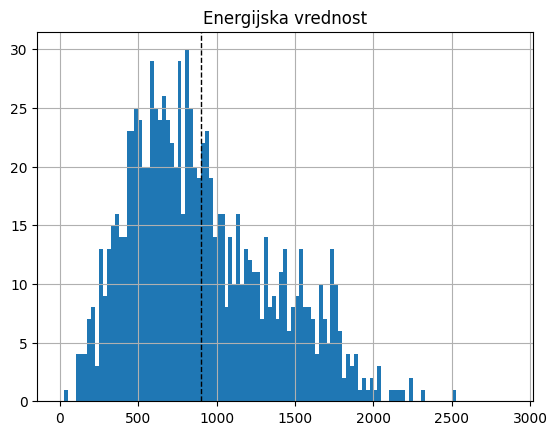

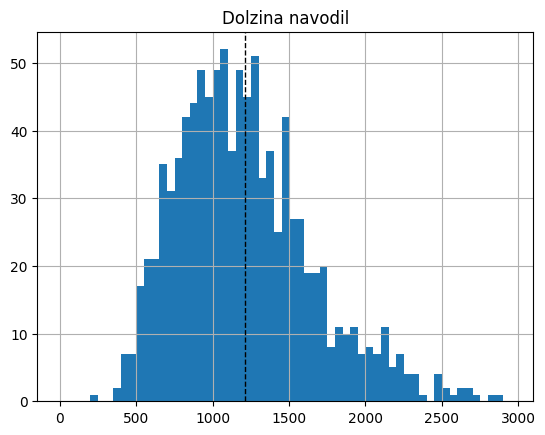

In [65]:
en_mean = recepti["Energijska vrednost"].mean()
recepti.hist("Energijska vrednost", bins = range(1,2900, 25))
plt.axvline(en_mean, color='k', linestyle='dashed', linewidth=1)
print("Povpre[ch]na energijska vrednost je: " + str(float(en_mean)) + " KJ")

dol_mean = recepti["Dolzina navodil"].mean()
recepti.hist("Dolzina navodil",bins = range(1,3000,50))
plt.axvline(dol_mean, color='k', linestyle='dashed', linewidth=1)
print("Povpre[ch]na dol[zh]ina besedila je: " + str(float(dol_mean)) + " znakov")



No pa si poglejmo [sh]e odvisnost med energijsko vrednostjo jedi in njihovimi makronutrienti.

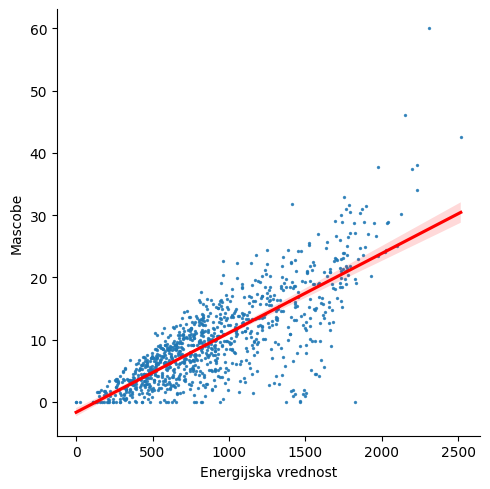

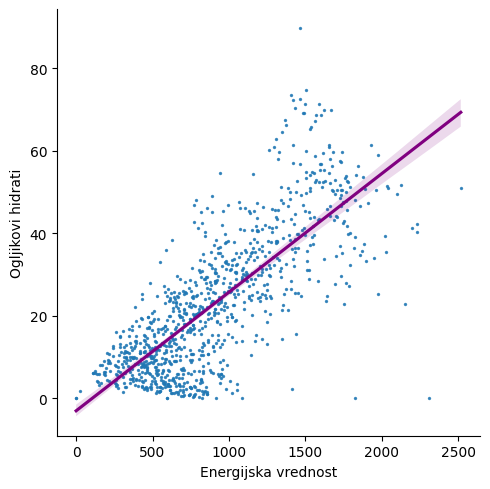

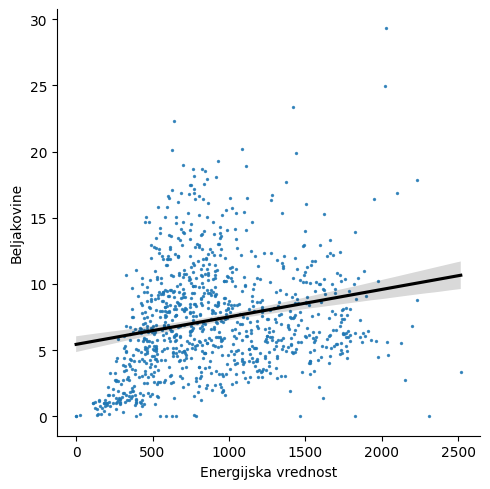

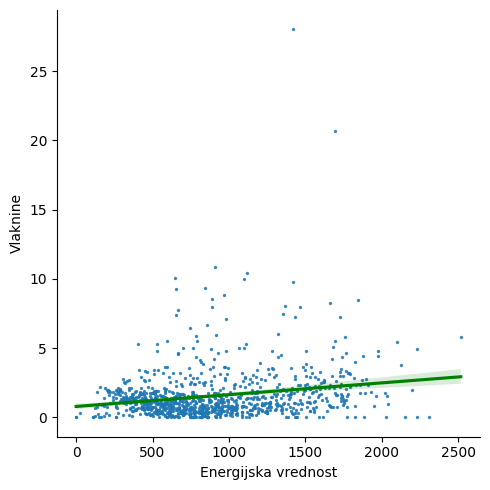

In [83]:
sns.lmplot(x="Energijska vrednost",y="Mascobe",data=recepti,fit_reg=True, line_kws={'color': 'red'},scatter_kws={"s": 2}) 
sns.lmplot(x="Energijska vrednost",y="Ogljikovi hidrati",data=recepti,fit_reg=True, line_kws={'color': 'purple'},scatter_kws={"s": 2}) 
sns.lmplot(x="Energijska vrednost",y="Beljakovine",data=recepti,fit_reg=True, line_kws={'color': 'black'},scatter_kws={"s": 2}) 
sns.lmplot(x="Energijska vrednost",y="Vlaknine",data=recepti,fit_reg=True, line_kws={'color': 'green'},scatter_kws={"s": 2}) 

Opazimo dokaj mo[ch]no pozitivno korelacijo med energijsko vrednostjo in koli[ch]ino ma[sh][ch]ob,ogljikovih hidratov ter do neke mere vlaknin, ki so posebne v tem da jih je v vseh jedeh dokaj malo. Za beljakovine pa je graf dokaj raztresen, tako da v tem primeru linearna regresija ni najbolj uporabna metoda. 

Obrnimo na[sh]o pozornost na dol[zh]ino priprave jedi. Mar so jedi z dalj[sh]im [ch]asom priprave bolj zapletena za pripravo? Morda je [ch]as priprave ponavadi dalj[sh]i od [ch]asa kuhanja?  

Povprecje [ch]asa priprave je: 25.469 min.
Povprecje [ch]asa kuhanja je: 35.502 min.


Text(0.5, 1.0, '')

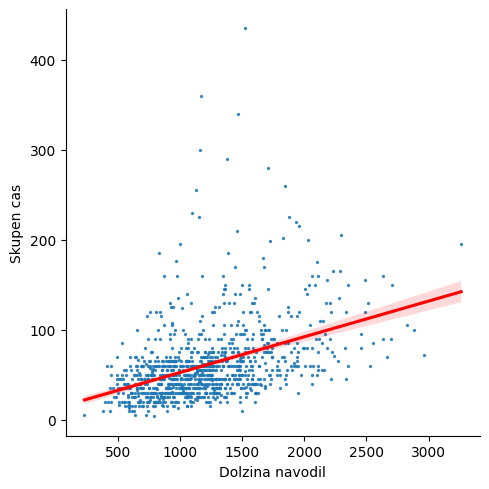

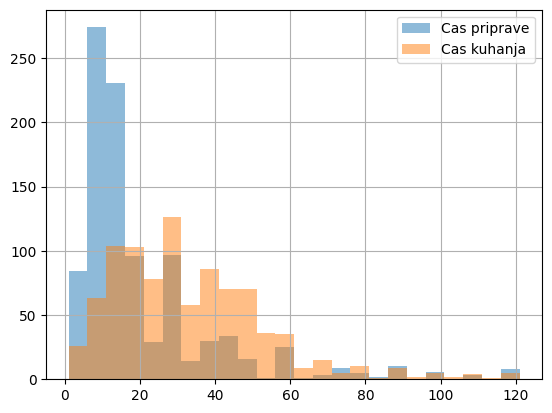

In [127]:
sns.lmplot(x="Dolzina navodil",y="Skupen cas",data=recepti,fit_reg=True, line_kws={'color': 'red'},scatter_kws={"s": 2}) 
print("Povprecje [ch]asa priprave je: " + str(float(recepti["Cas priprave"].mean())) + " min.")
print("Povprecje [ch]asa kuhanja je: " +  str(float(recepti["Cas kuhanja"].mean())) + " min.")

# truncatamo nekaj outlierjev zavoljo boljse preglednosti
recepti.hist("Cas priprave", bins=range(1,125,5), alpha=0.5, label='Cas priprave')
plt.hist(recepti["Cas kuhanja"], bins=range(1,125,5), alpha=0.5, label='Cas kuhanja')
plt.legend(loc='upper right')
plt.title("")

Opazimo pozitivno korelacijo med dolzino navodil in skupnim casom kuhanja, izgleda da bolj komplicirani recepti ponavadi vendarle zahtevajo dlje casa za izvedbo. Prav tako vidimo da ve[ch]inoma cas priprave ne presega 20 minut, cas kuhanja pa se pogosto zavlece tudi do kaksne ure, torej cas priprave ponavadi ni bottleneck pri kuhanju. Oglejmo si se statistiko piscev na okusno.je. 

In [153]:
recepti.groupby("Avtor").agg("size").sort_values(ascending=False).head(10)

Avtor
M. J.            475
Su.S.            157
M.J.             137
Sanja Sirk       100
Kristina Turk     16
Su. S.            15
T. G.             10
Tjaša Ribič       10
MasterChef         8
Bruno Šulman       8
dtype: int64

Vidimo lahko, da je razmeroma malo avtorjev odgovornih za vecino receptov na okusno.je. Ce upostevamo da sta `M.J.` in `M. J.` ter `Su.S.` in `Su. S.` ocitno isti osebi, je prvih 8 avtorjev odgovornih za 936 (od 1000) receptov! Poglejmo si vodilna `M. J.` in `Su.S.` podrobneje.

In [166]:
print("Povprecen cas peke avtorja M.J.: " + str(int(recepti[recepti["Avtor"] == "M. J."]["Skupen cas"].mean())) + " min")
print("Povprecen cas peke avtorja Su.S.: " + str(int(recepti[recepti["Avtor"] == "Su.S."]["Skupen cas"].mean())) + " min")
print("Povprecen kaloricna vrednost avtorja M.J.: " + str(int(recepti[recepti["Avtor"] == "M. J."]["Energijska vrednost"].mean())) + " KJ")
print("Povprecen kaloricna vrednost avtorja Su.S.: " + str(int(recepti[recepti["Avtor"] == "Su.S."]["Energijska vrednost"].mean())) + " KJ")
print("Povprecna kolicina proteinov avtorja M.J.: " + str(int(recepti[recepti["Avtor"] == "M. J."]["Beljakovine"].mean())) + " g")
print("Povprecna kolicina proteinov avtorja Su.S.: " + str(int(recepti[recepti["Avtor"] == "Su.S."]["Beljakovine"].mean())) + " g")
print("Povprecna kolicina mascob avtorja M.J.: " + str(int(recepti[recepti["Avtor"] == "M. J."]["Mascobe"].mean())) + " g")
print("Povprecna kolicina mascob avtorja Su.S.: " + str(int(recepti[recepti["Avtor"] == "Su.S."]["Mascobe"].mean())) + " g")

Povprecen cas peke avtorja M.J.: 57 min
Povprecen cas peke avtorja Su.S: 56 min
Povprecen kaloricna vrednost avtorja M.J.: 889 KJ
Povprecen kaloricna vrednost avtorja Su.S: 972 KJ
Povprecna kolicina proteinov avtorja M.J.: 7 g
Povprecna kolicina proteinov avtorja Su.S: 7 g
Povprecna kolicina mascob avtorja M.J.: 9 g
Povprecna kolicina mascob avtorja Su.S: 10 g
Povprecen cas peke avtorja M.J.: 21 min
Povprecen cas peke avtorja Su.S: 24 min


Zgleda da sta si najbolj prolifericna avtorja kar jih okusno.je premore med sabo dokaj podobna. Cas peke, kolicina mascob/beljakovin sta skoraj ce ne identicni, so pa `Su.S.` jedi rahlo energijsko bogatejse.

## Mercator analiza

Oglejmo si se nekaj dejstev o izdelkih, ki jih ponuja Mercatorjeva spletna trgovina. 

In [6]:
izdelki = pd.read_csv("data/izdelki.csv")
izdelki.drop(columns="Promocijska cena").describe()

,Cena,Kolicina
count,15379.000000,15379.000000
mean,6.836622,34.503386
std,19.248111,211.534196
min,0.090000,0.001000
25%,1.990000,1.000000
50%,3.490000,1.000000
75%,6.290000,1.000000
max,1099.990000,10000.000000


Vidimo, da je povprecna cena v mercatorju 6.8 EUR (po redni ceni). Promocijske cene si bomo ogledali pozneje, saj v primeru ko ni promocije je vrednost v tabeli `0.0`, kar bi tu kvarilo povprecje. Recimo, da nas zanima katera znamka je najugodnejsa:

In [248]:
izdelki.groupby("Znamka").agg("Cena").mean().sort_values()

Znamka
PRIME                 0.300000
BANANKO               0.390000
ZOTT KAFFEE GOLD      0.390000
FALLINI               0.430000
ZOTT LIEGEOIS         0.490000
                       ...    
BLIST VALJEVO       219.990000
MAMIBOT             259.990000
ROWENTA             293.323333
ASUS                379.990000
AVENLI              446.596000
Name: Cena, Length: 1876, dtype: float64

Najcenejsi sta torej znamki `Prime` ter  `Zott Kaffe Gold`, najdrazji pa `Asus` in `Avenli`, prodajalca racunalnikov in pa bazenov. Nas seveda najbolj zanimajo prodajalci hrane, da bomo lahko izvedli povezavo z okusno.je ;). Morda bolj kot po znamki je smiselno filtriranje po kategoriji, [ch]eprav so tudi tu rezultati na[ch]eloma dokaj predvidljivi. 

In [249]:
izdelki.groupby("Kategorija").agg("Cena").mean().sort_values()

Kategorija
ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ; EDOV ENARIZAGEN               0.656667
 VANILIJ SLADKOR; PECILNI PRAŠEK                                          0.676875
ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ;IKTADOD Z EDOV ENARIZAGEN      0.690000
ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ; EDOV ENARIZAG                 0.790000
 NEGAZIRANE VODE Z DODATKI                                                0.876364
                                                                           ...    
 ELEKTRIČNE ZOBNE ŠČETKE                                                103.272000
 OGREVANJE                                                              113.323333
 POTOVANJE                                                              149.980000
 TELEVIZORJI                                                            299.990000
 BAZENI IN BAZENSKA TEHNIKA                                             602.492500
Name: Cena, Length: 470, dtype: float64

Opala, izgleda da so nekateri kategorije bile na spletni strani narobe podane. Izbrisimo jih iz tabele:

In [255]:
izdelki = izdelki[izdelki["Kategorija"] != "ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ; EDOV ENARIZAGEN"]
izdelki = izdelki[izdelki["Kategorija"] != "ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ;IKTADOD Z EDOV ENARIZAGEN"]
izdelki = izdelki[izdelki["Kategorija"] != "ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ; EDOV ENARIZAG"]
izdelki = izdelki[izdelki["Kategorija"] != "ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ;IKTADOD Z EDOV ENARIZAG"]
izdelki.groupby("Kategorija").agg("Cena").mean().sort_values()

Kategorija
VANILIJ SLADKOR; PECILNI PRAŠEK      0.676875
NEGAZIRANE VODE Z DODATKI            0.876364
GAZIRANE VODE Z DODATKI              1.006667
PEKOVSKO PECIVO                      1.036383
KVAS                                 1.094286
                                      ...    
ELEKTRIČNE ZOBNE ŠČETKE            103.272000
OGREVANJE                          113.323333
POTOVANJE                          149.980000
TELEVIZORJI                        299.990000
BAZENI IN BAZENSKA TEHNIKA         602.492500
Name: Cena, Length: 466, dtype: float64

Po pricakovanjih so najcenejsi izdelki na kos manjse trosarine, najdrazja pa je elektronika, ter kot je prejsnja tabela nakazovala, bazeni. Mogoce bi bila koristna vizualizacija z besednimi oblaki, da dobimo celotno sliko. Spodnja slika prikazuje najpogostejse kategorije, vecje kot je besedilo, vec izdelkov je v tej kategoriji. Vidimo, da prevladujejo cokolada, prehranska dopolnila in deodoranti.

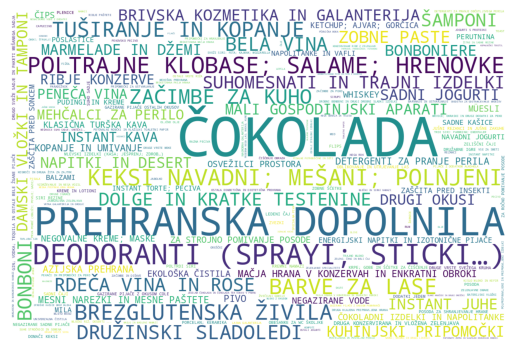

In [242]:
wordcloud = WordCloud(width=1200, height=800,background_color="white").generate_from_frequencies(izdelki["Kategorija"].value_counts())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Hegelska sinteza

No pa se povzpnimo na vrh dramskega trikotnika te seminarske naloge in ugotovimo katere jedi so najcenejse za pripravo, katere so najdrazje, in vse vmes.

In [13]:
# pomozna funkcija da ugotovimo podobnost stringov
from difflib import SequenceMatcher
import re
import utility as ut

def similar_single(a, b):
    return SequenceMatcher(None, a, b).ratio()
# razdeli stringe na besede in primerja podobnost besed (drugace dobimo absurdne rezultate, npr. "olivnega olja" matcha z "Hladilna torba")
def similar(a,b):
    #a = re.sub(r"[\(\[].*?[\)\]]", "", a)
    #b = re.sub(r"[\(\[].*?[\)\]]", "", b) # odstranimo vse med oklepaji
    r = 0
    #r -= abs(len(a) - len(b))*2 # penalty ce imena izdelkov nimata enakih imen
    for i in a.strip().split():
        for j in b.strip().split():
            #ratio = similar_single(i,j)    
            #if ratio >= 0.8: r += ratio * 100 # ce je match dovolj blizu, buffamo
            #else: r+=ratio # drugace samo dodamo vrednost
            cnt = 0
            for k in range(min(len(i),len(j))):
                if i[k] != j[k]: break
                cnt+=1
            if cnt > 3: r += cnt*cnt
    return r

f = open("data/cene.csv", "w")
f.write("Ime jedi,Cena,Promocijska cena\n")
default_cena = 1 # default parameter ce ne najdemo nobenega podobnega izdelka
# za vsako jed gremo cez vse sestavine in jim dolocimo ceno
for _,recepti_row in recepti.iterrows():
    csv = recepti_row["CSV"]
    # dobimo vse sestavine
    sestavine = pd.read_csv("data/recepti_sestavine/" + csv + ".csv")
    skupna_cena = 0
    skupna_promocijska_cena = 0
    # iz imena sestavine najdemo najblizji match v tabeli izdelkov
    for _,row in sestavine.iterrows():
        ime = row["Ime sestavine"]
        kolicina = row["Kolicina"]
        enota = row["Enota"]
        # najdi match
        best_match = 0.6 # neka zacetna toleranca
        best_cena = default_cena
        best_prom_cena = default_cena
        bbb = "AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA"
        for i,r in izdelki.iterrows():
            if enota != r["Enota"]: continue # ce nista v istih enotah nadaljujemo            
            sim = similar(r["Ime izdelka"],ime)         
            if sim < best_match: continue # ugotovimo podobnost, ce je slabsa od trenutnega najboljsega nadaljujemo
            best_match = sim
            bbb = r["Ime izdelka"]
            # prioriteta je najblizji zadetek, ce je vec enakih gledamo najnizjo ceno
            if sim > best_match:
                best_cena = r["Cena"] * kolicina
            else: best_cena = min(best_cena, r["Cena"] * kolicina)
            # ce je promocijska cena 0.0, ni promocije
            if r["Promocijska cena"] == 0.0: continue
            # enako za prom. ceno
            if sim > best_match:
                best_prom_cena = r["Promocijska cena"] * kolicina
            else: best_prom_cena = min(best_prom_cena, r["Promocijska cena"] * kolicina)
            #print(bbb + " | " + ime)
        # povecamo vrednosti
        skupna_cena += best_cena
        skupna_promocijska_cena += best_prom_cena
    # shranimo ceni za to jed v csv
    f.write(ut.arr_to_csv([recepti_row["Ime jedi"],skupna_cena,skupna_promocijska_cena]))
f.close()


test
test
test
test
test
test
test
test
test
test


KeyboardInterrupt: 